# 1. Import CSV

In [83]:
import pandas as pd

df = pd.read_csv('annote_yidi.csv')


print(df)


    GOLD EI NS FT PJ                                           vacances  \
0   INFP  I  N  F  P  J'aime beaucoup voyager (que cela soit en Fran...   
1   ENFP  E  N  F  P  Je préfère les voyages de vacances non planifi...   
2   INTJ  I  N  T  P  aller dans des endroits / lieux visuellement b...   
3   INFJ  E  N  F  P  Partir dans un endroit que je ne connais pas, ...   
4   INTP  I  N  T  P  Mon type de vacances préféré est lorsque je re...   
..   ... .. .. .. ..                                                ...   
60  ESTJ  E  S  T  J  Sortir avec des amis qui forment une équipe bi...   
61  ENFJ  I  N  F  P  J’aime bien trouver des lieux pas très populai...   
62  ISTP  E  S  F  P  J’aime bien les vacances chills. J’aime bien a...   
63  ISTJ  I  S  T  J  Si j'ai plus ou moins un mois pour les vacance...   
64  INFP  I  N  F  P  Partir en vacances avec quelques amis, dans un...   

                                          Passe-temps  
0   J'aime beaucoup écrire, apprendre des l

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def count_and_plot_pie_charts_with_tables(csv_filename, column_number):
    df = pd.read_csv(csv_filename)

    col_name = df.columns[column_number]

    df[f'{col_name}_1'] = df[col_name].str[0]
    df[f'{col_name}_2'] = df[col_name].str[1]
    df[f'{col_name}_3'] = df[col_name].str[2]
    df[f'{col_name}_4'] = df[col_name].str[3]

    for i in range(1, 5):
        part_name = f'{col_name}_{i}'
        value_counts = df[part_name].value_counts()

        clear_yellow = '#FFFF66'
        clear_blue = '#66B3FF'
        colors = [clear_yellow, clear_blue]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                textprops={'fontsize': 14})  

        values = ', '.join(value_counts.index[:2]) 
        ax.set_title(f"Repartition de {values} dans le corpus", fontsize=16)

        table_data = [(value, count) for value, count in zip(value_counts.index, value_counts)]
        table = plt.table(cellText=table_data, cellLoc='center', loc='bottom', colLabels=['Catégorie', 'Fréquence'])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.2)

        plt.subplots_adjust(top=0.8) 

        plt.show()

count_and_plot_pie_charts_with_tables('annote_yidi.csv', 0)


# 3. Accuracy

In [101]:
import pandas as pd
def accuracy_ei_ponderer(csv_filename):
    
    I=38
    E=27


    df = pd.read_csv(csv_filename)

    e_correct_annotations = 0
    i_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['EI']

        if 'E' in GOLD and 'E' in test:
            e_correct_annotations += 1
        elif 'I' in test and 'I' in GOLD:
            i_correct_annotations +=1


        e_accuracy = (e_correct_annotations / E) * 100
        i_accuracy= (i_correct_annotations/I)*100

        EI_ac_pond = (e_accuracy*E+i_accuracy*I)/(E+I)
    return EI_ac_pond

def accuracy_NS_ponderer(csv_filename):
    
    N=51
    S=14


    df = pd.read_csv(csv_filename)

    N_correct_annotations = 0
    S_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['NS']

        if 'N' in GOLD and 'N' in test:
            N_correct_annotations += 1
        elif 'S' in test and 'S' in GOLD:
            S_correct_annotations +=1


        S_accuracy = (S_correct_annotations / S) * 100
        N_accuracy= (N_correct_annotations/N)*100

        NS_ac_pond = (S_accuracy*S+N_accuracy*N)/(N+S)
    return NS_ac_pond

def accuracy_PJ_ponderer(csv_filename):
    
    P=32
    J=33


    df = pd.read_csv(csv_filename)

    P_correct_annotations = 0
    J_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['PJ']

        if 'P' in GOLD and 'P' in test:
            P_correct_annotations += 1
        elif 'J' in test and 'J' in GOLD:
            J_correct_annotations +=1


        P_accuracy = (P_correct_annotations / P) * 100
        J_accuracy= (J_correct_annotations/J)*100

        PJ_ac_pond = (P_accuracy*P+J_accuracy*J)/(P+J)
    return PJ_ac_pond

def accuracy_FT_ponderer(csv_filename):
    
    F=43
    T=22


    df = pd.read_csv(csv_filename)

    F_correct_annotations = 0
    T_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['FT']

        if 'F' in GOLD and 'F' in test:
            F_correct_annotations += 1
        elif 'T' in test and 'T' in GOLD:
            T_correct_annotations +=1


        F_accuracy = (F_correct_annotations / F) * 100
        T_accuracy= (T_correct_annotations/T)*100

        FT_ac_pond = (F_accuracy*F+T_accuracy*T)/(T+F)
    return FT_ac_pond


In [106]:
EI1=accuracy_ei_ponderer('annote_yidi.csv')
EI2=accuracy_ei_ponderer('annote_kexin.csv')
NS2=accuracy_NS_ponderer('annote_kexin.csv')
NS1=accuracy_NS_ponderer('annote_yidi.csv')
FT1=accuracy_FT_ponderer('annote_yidi.csv')
FT2=accuracy_FT_ponderer('annote_kexin.csv')
PJ1=accuracy_PJ_ponderer('annote_yidi.csv')
PJ2=accuracy_PJ_ponderer('annote_kexin.csv')



print(EI1,EI2,NS1,NS2)
print(FT1,FT2,PJ1,PJ2)

81.53846153846153 76.92307692307692 86.15384615384616 86.15384615384616
81.53846153846153 84.61538461538461 63.07692307692308 64.61538461538461


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values)
data = {
    'Category': ['EI', 'NS', 'FT', 'PJ'],
    'Annotatrice1': [EI1, NS1, FT1, PJ1],
    'Annotatrice2': [EI2, NS2, FT2, PJ2]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the x-axis labels
x_labels = df['Category']
x = np.arange(len(x_labels))  # X-axis values

# Set the data for plotting
width = 0.35  # Width of each bar

# Create subplots for each category
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size (width, height)

# Define colors for each dataset (yellow and lighter blue)
colors = ['gold', 'lightsteelblue']

# Create bars for each category and dataset with different colors
for i, col in enumerate(['Annotatrice1', 'Annotatrice2']):
    values = df[col]
    bar_positions = x + i * width  # Adjust bar positions for each dataset
    ax.bar(bar_positions, values, width, label=col, color=colors[i])

    # Add value numbers slightly to the left within each column's bar
    for j, value in enumerate(values):
        text_x = bar_positions[j] + width / 2 - 0.2 # Adjust the x-coordinate to move slightly to the left
        ax.text(text_x, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the x-ticks and labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_labels, fontsize=14)  # Increase the size of letters
ax.set_xlabel('Catégories', fontsize=14)  # Increase the size of the x-axis label
ax.set_ylabel('Accuracy', fontsize=14)  # Increase the size of the y-axis label

# Set the title and legend
ax.set_title('Accuracy pondéré par 2 annotatrices', fontsize=16)  # Increase the size of the title
ax.legend(fontsize=12)  # Increase the size of the legend

# Show the plot
plt.tight_layout()  # Ensure the plot fits within the figure size
plt.show()


# AIA

Probabilité d'accord (Po) : 0.8
Probabilité d'accord simultané (Pe) : 0.6698224852071006
kappa : 0.39426523297491045


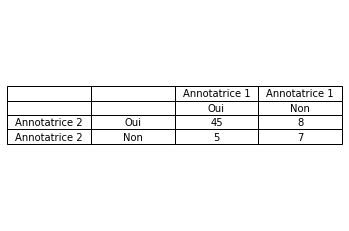

In [155]:
def AIA(test_colone):
    df1 = pd.read_csv('annote_yidi.csv')
    df2 = pd.read_csv('annote_kexin.csv')

    A,B,C,D=0,0,0,0
    for index, row1 in df1.iterrows():
        GOLD = row1['GOLD']
        test1 = row1[test_colone]

        row2 = df2.iloc[index] 
        test2 = row2[test_colone]

        if test1 in GOLD and test2 in GOLD :
            A+=1
        elif test1 in GOLD and test2 not in GOLD:
            B+=1
        elif test1 not in GOLD and test2 in GOLD :
            C+=1
        elif test1 not in GOLD and test2 not in GOLD :
            D+=1
    Po=(A+D)/(A+B+C+D)
    Oui= (A+C)/(A+B+C+D)*(A+B)/(A+B+C+D)
    Non=(B+D)/(A+B+C+D)*(C+D)/(A+B+C+D)
    Pe=Oui+Non
    Kappa = (Po-Pe)/(1-Pe)

    print(f"Probabilité d'accord (Po) : {Po}\nProbabilité d'accord simultané (Pe) : {Pe}\nkappa : {Kappa}")
    
    matrice = [['', '', 'Annotatrice 1', 'Annotatrice 1'],
           ['', '', 'Oui', 'Non',],
           ['Annotatrice 2', 'Oui', A, B],
           ['Annotatrice 2', 'Non', C, D]]

    fig, ax = plt.subplots()
    ax.axis('off')  # Masquez les axes

    # Créez un tableau pour afficher la matrice
    table = plt.table(cellText=matrice, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)

    # Affichez le plot
    plt.show()




(AIA('EI'))    

Probabilité d'accord (Po) : 0.8153846153846154
Probabilité d'accord simultané (Pe) : 0.7614201183431953
kappa : 0.22619047619047591


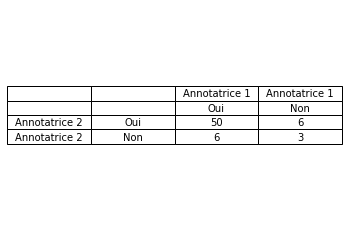

Probabilité d'accord (Po) : 0.7538461538461538
Probabilité d'accord simultané (Pe) : 0.7183431952662722
kappa : 0.12605042016806708


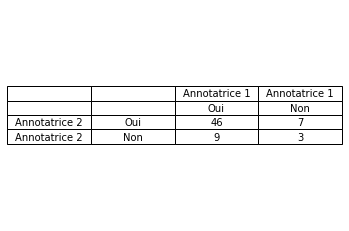

Probabilité d'accord (Po) : 0.6615384615384615
Probabilité d'accord simultané (Pe) : 0.5342011834319527
kappa : 0.27337398373983735


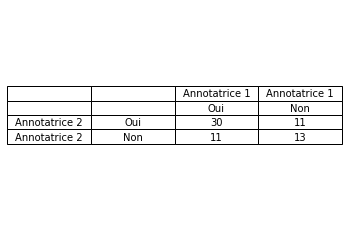

In [156]:
AIA('NS')
AIA('FT')
AIA('PJ')